In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option("display.max_columns", 101)

In [86]:
df = pd.read_excel('default_of_credit_card_clients_0.xlsx')

In [87]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [88]:
df.isna().any().any()

False

In [89]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [90]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                             9
PAY_2                             9
PAY_3                             9
PAY_4                             9
PAY_5                             8
PAY_6                             8
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [91]:
print('unique_values_in_categorical_columns')
for column in df.loc[:,df.nunique() < 10].columns:
    print(column, ' : ', df.loc[:,df.nunique() < 10][column].unique())

unique_values_in_categorical_columns
SEX  :  [2 1]
EDUCATION  :  [2 1 3 5 4 6 0]
MARRIAGE  :  [1 2 3 0]
PAY_0  :  [2 0 1 3 4 8 7 5 6]
PAY_2  :  [2 0 3 5 7 4 1 6 8]
PAY_3  :  [0 2 3 4 6 7 1 5 8]
PAY_4  :  [0 2 3 4 5 7 6 1 8]
PAY_5  :  [0 2 3 5 4 7 8 6]
PAY_6  :  [0 2 3 6 4 7 8 5]
default payment next month  :  [1 0]


In [92]:
#Data is clean, let's shuffle prepare for machine learning model
df.drop('ID', axis=1, inplace=True)
X = df.copy()
y = X.pop('default payment next month')

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47)

In [93]:
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE']
numerical_columns = ['LIMIT_BAL', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

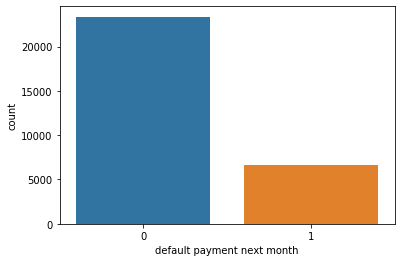

In [94]:
sns.countplot(y)
#default payment, Y (Yes = 1, No = 0)

In [120]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [134]:
def evaluate_model(pipe, X_train, y_train, X_test, y_test):
    pipe.fit(X_train, y_train)
    fig = plt.figure(figsize=(16,4))
    print('train set:')
    y_train_pred = pipe.predict(X_train) > 0.5
    fig.add_subplot(121)
    sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('train')
    plt.xlabel('predicted')
    plt.ylabel('actual')
    print(classification_report(y_train, y_train_pred))

    print('test set:')
    y_test_pred = pipe.predict(X_test) > 0.5
    fig.add_subplot(122)
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('test')
    plt.xlabel('predicted')
    plt.ylabel('actual')
    print(classification_report(y_test, y_test_pred))

train set:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     15700
           1       0.00      0.00      0.00      4400

    accuracy                           0.78     20100
   macro avg       0.39      0.50      0.44     20100
weighted avg       0.61      0.78      0.69     20100

test set:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      7664
           1       0.33      0.00      0.00      2236

    accuracy                           0.77      9900
   macro avg       0.55      0.50      0.44      9900
weighted avg       0.67      0.77      0.68      9900



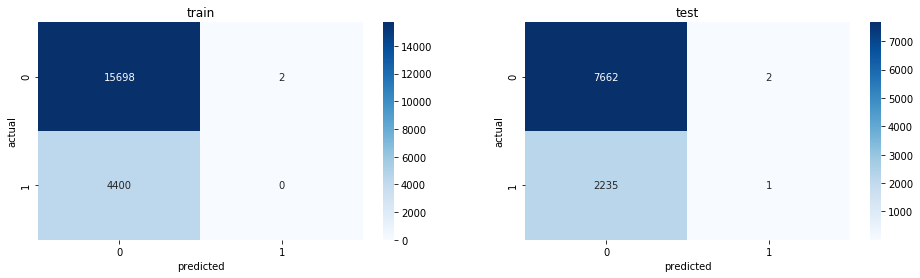

In [137]:
#One hot encoding of categorical columns
#No scaling of Numerical Columns
col_trans = ColumnTransformer([('oh', OneHotEncoder(handle_unknown='ignore',sparse=False), categorical_columns)], 
                              remainder='passthrough')
pipe = Pipeline(steps = [('column_transformation', col_trans),
                         ('model', LogisticRegression(max_iter=1000))])
evaluate_model(pipe, X_train, y_train, X_test, y_test)

train set:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89     15700
           1       0.68      0.33      0.44      4400

    accuracy                           0.82     20100
   macro avg       0.76      0.64      0.67     20100
weighted avg       0.80      0.82      0.79     20100

test set:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7664
           1       0.71      0.33      0.45      2236

    accuracy                           0.82      9900
   macro avg       0.77      0.64      0.67      9900
weighted avg       0.80      0.82      0.79      9900



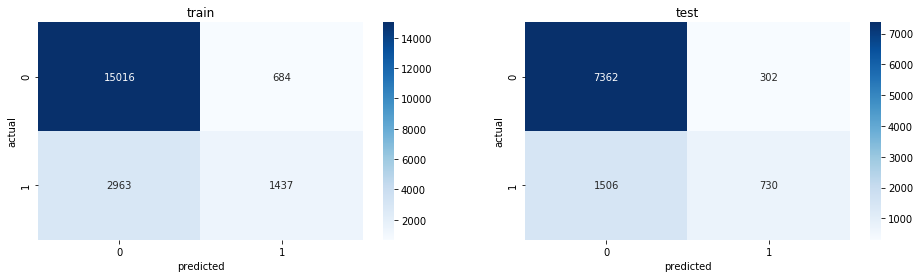

In [140]:
#One hot encoding of categorical columns
#scaling of Numerical Columns
col_trans = ColumnTransformer([('oh', OneHotEncoder(handle_unknown='ignore',sparse=False), categorical_columns),
                               ('ss', StandardScaler(), numerical_columns)], remainder='passthrough')
pipe = Pipeline(steps = [('column_transformation', col_trans),
                         ('model', LogisticRegression(max_iter=1000))])
evaluate_model(pipe, X_train, y_train, X_test, y_test)

train set:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86     15700
           1       0.50      0.57      0.53      4400

    accuracy                           0.78     20100
   macro avg       0.69      0.70      0.69     20100
weighted avg       0.79      0.78      0.78     20100

test set:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      7664
           1       0.51      0.56      0.53      2236

    accuracy                           0.78      9900
   macro avg       0.69      0.70      0.69      9900
weighted avg       0.79      0.78      0.78      9900



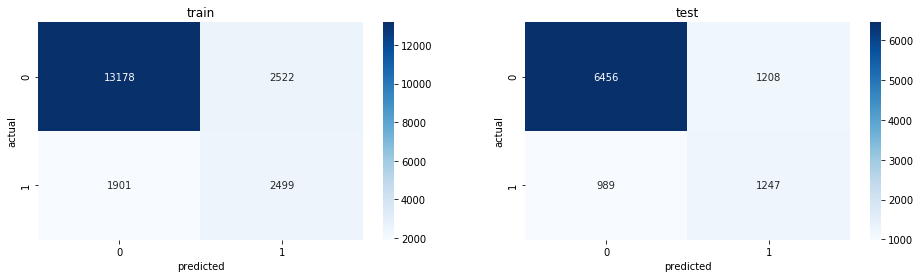

In [144]:
#One hot encoding of categorical columns
#scaling of Numerical Columns
#Giving balanced weights to 0 and 1
col_trans = ColumnTransformer([('oh', OneHotEncoder(handle_unknown='ignore',sparse=False), categorical_columns),
                               ('ss', StandardScaler(), numerical_columns)], remainder='passthrough')
pipe = Pipeline(steps = [('column_transformation', col_trans),
                         ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))])
evaluate_model(pipe, X_train, y_train, X_test, y_test)

train set:
              precision    recall  f1-score   support

           0       0.93      0.19      0.31     15700
           1       0.25      0.95      0.39      4400

    accuracy                           0.35     20100
   macro avg       0.59      0.57      0.35     20100
weighted avg       0.78      0.35      0.33     20100

test set:
              precision    recall  f1-score   support

           0       0.93      0.19      0.31      7664
           1       0.25      0.95      0.40      2236

    accuracy                           0.36      9900
   macro avg       0.59      0.57      0.36      9900
weighted avg       0.77      0.36      0.33      9900



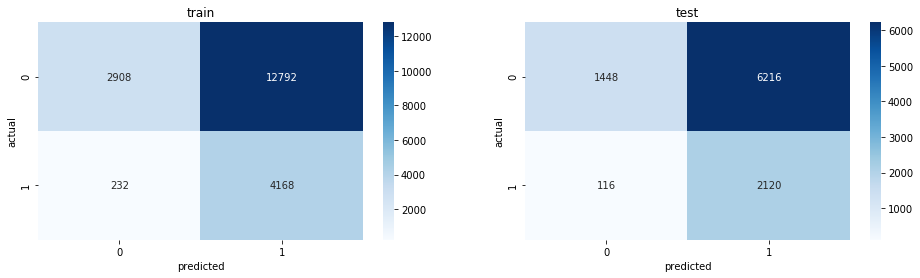

In [145]:
#In case of detection of defaulter is important recall for class 1 to be increased
#One hot encoding of categorical columns
#scaling of Numerical Columns
#Giving more weights to 1 compared to 0
col_trans = ColumnTransformer([('oh', OneHotEncoder(handle_unknown='ignore',sparse=False), categorical_columns),
                               ('ss', StandardScaler(), numerical_columns)], remainder='passthrough')
pipe = Pipeline(steps = [('column_transformation', col_trans),
                         ('model', LogisticRegression(max_iter=1000, class_weight={0: 0.1, 1:0.9}))])
evaluate_model(pipe, X_train, y_train, X_test, y_test)

In [149]:
#RANDOM FORREST
#No Feature scaling , No One Hot encoding
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15700
           1       1.00      1.00      1.00      4400

    accuracy                           1.00     20100
   macro avg       1.00      1.00      1.00     20100
weighted avg       1.00      1.00      1.00     20100

test set:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7664
           1       0.67      0.34      0.45      2236

    accuracy                           0.81      9900
   macro avg       0.75      0.64      0.67      9900
weighted avg       0.79      0.81      0.79      9900



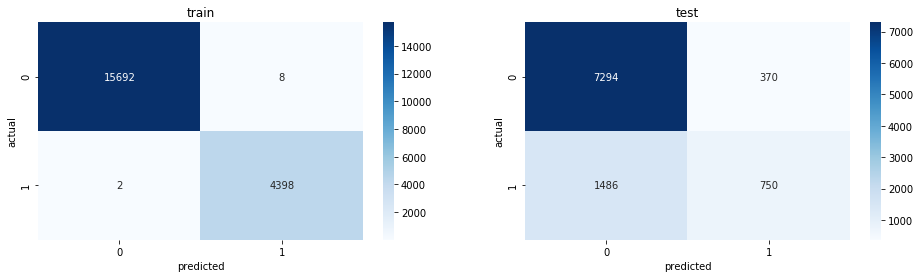

In [158]:
#Baseline Random Forrest
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)
evaluate_model(model, X_train, y_train, X_test, y_test)
#Very good in fitting train set very bad at test set

In [159]:
parameters = {'n_estimators':[100, 200],
              'max_depth':[None, 10],
              'min_samples_split' : [2, 8],
              'min_samples_leaf' : [1, 4],       
}
gs = GridSearchCV(model, parameters, scoring='f1', cv=3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [160]:
gs.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

train set:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89     15700
           1       0.59      0.66      0.62      4400

    accuracy                           0.82     20100
   macro avg       0.74      0.77      0.75     20100
weighted avg       0.83      0.82      0.83     20100

test set:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7664
           1       0.52      0.57      0.54      2236

    accuracy                           0.78      9900
   macro avg       0.69      0.71      0.70      9900
weighted avg       0.79      0.78      0.79      9900



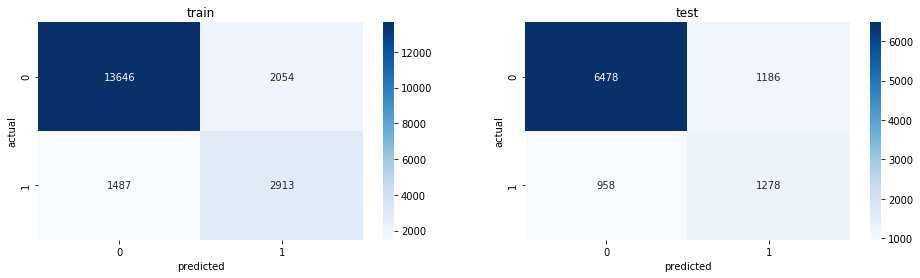

In [161]:
evaluate_model(gs.best_estimator_, X_train, y_train, X_test, y_test)